# Gibbs Sampler para los modelos hard-core y q-coloring


Autores: 
- Daniel Alejandro García Hernández
- David Camilo Cortes Salazar

En este notebook se encuentra una implementación del Gibbs Sampler para Hard-core y q-colorings. 

Las librerías necesarias para ejectuar el código son:

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

---
## **Punto 1: Gibbs Sampler para el modelo Hard-Core**

Iniciamos creando la grilla del módelo. Para esto, creamos un grafo cuadrado 2D de NetworkX, el cuál recibe de input el valor de $k$, las dimensiones del grafo. $3\leq k \leq 20$.

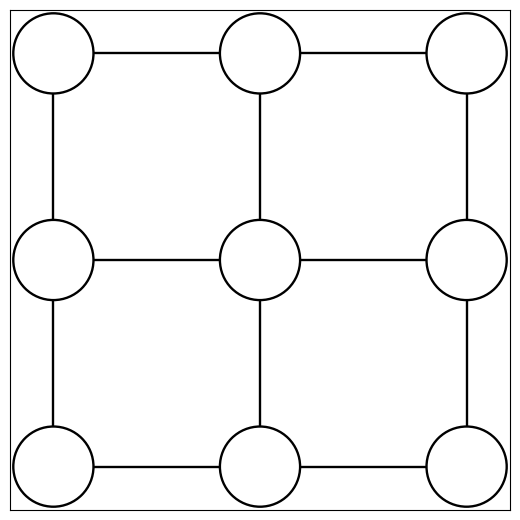

In [2]:
def restart_G(k):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    color_values = {node: "white" for i, node in enumerate(G.nodes())}
    return G, color_values

    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": int(30000/k**2),
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(5 + 0.1*k, 5 + 0.1*k))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    
    

k = 3

    
# Iniciar el valor de los colores
G, color_values = restart_G(k)  

# Graficar la grilla
plot_grid(color_values)

Definimos la función que actualiza el sistema en un único paso; es decir, pasa de $X_n$  a $X_{n+1}$. Para esto, el algoritmo:

1. Elige un vértice $v$ al azar, con distribución uniforme.
2. Lanza una moneda justa.
3. Si el resultado es "cara", y todos los vecinos del nodo $v$ son blancos, entonces colorea el nodo $v$ de negro.
4. Si el resultado del lanzamiento es "sello", coloréa el vértice $v$ de blanco.

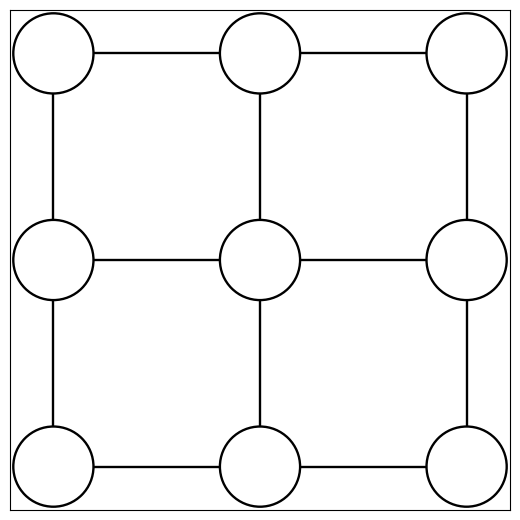

In [3]:
def step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))

    coin = random.choice(("cara", "sello"))

    if coin == "cara":
        
        if "black" in [color_values[vecino] for vecino in [n for n in G.neighbors((x,y))]]: # Revisa si algun vecino es negro
            color_values[(x,y)] = "white" # Si es cierto, el nodo se cambia a blanco
        else: color_values[(x,y)] = "black" # Si es falso, el nodo se cambia a negro

    else:
        color_values[(x,y)] = "white"

step()

plot_grid(color_values)

Para ayudar a visualizar la evolución del sistema, graficamos algunos pasos iniciales, así como la configuración final después de 50 pasos:

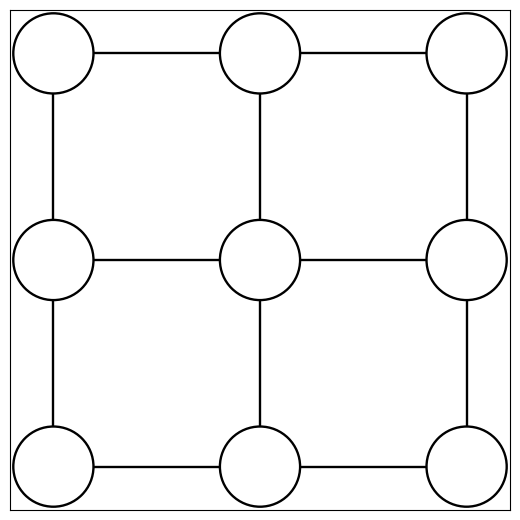

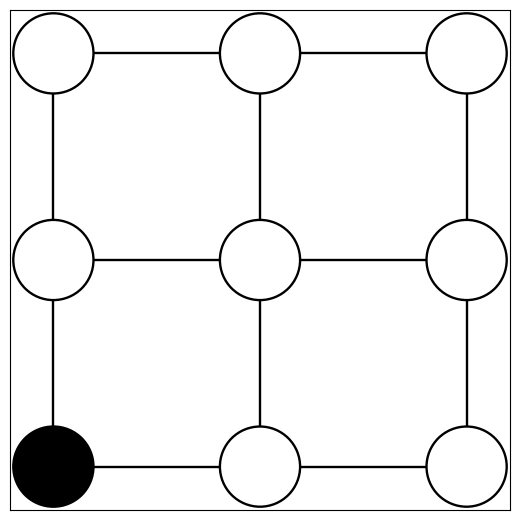

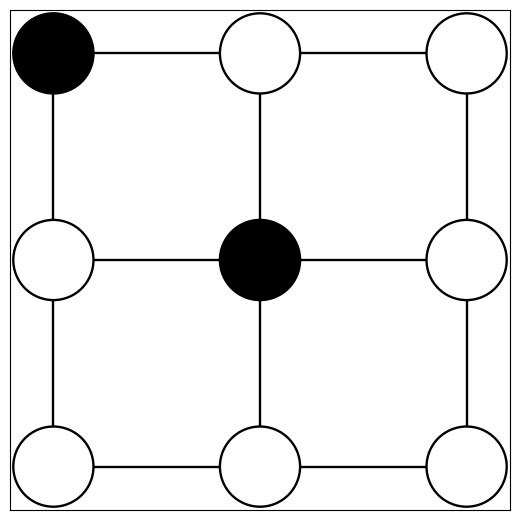

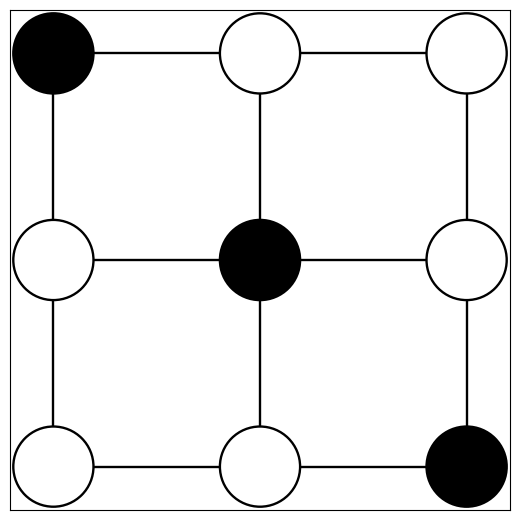

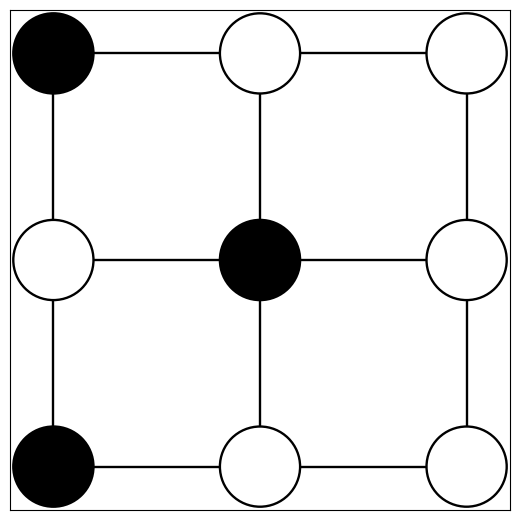

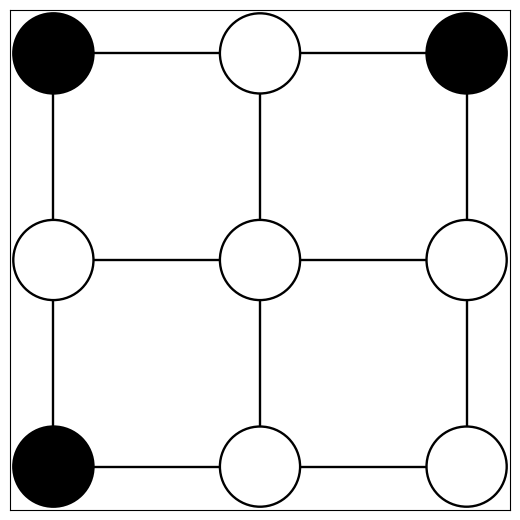

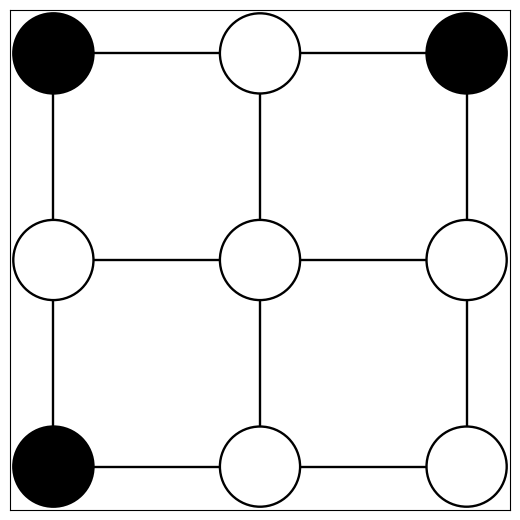

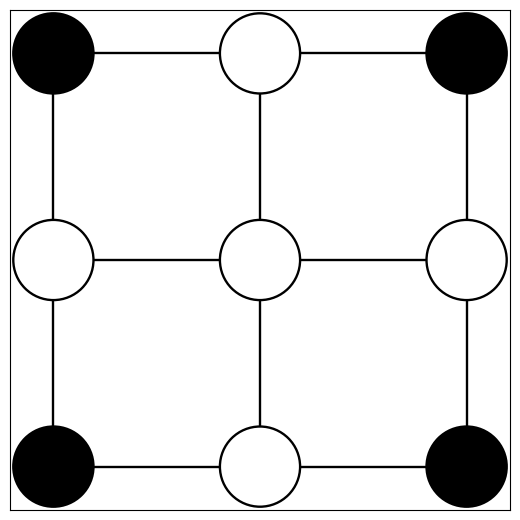

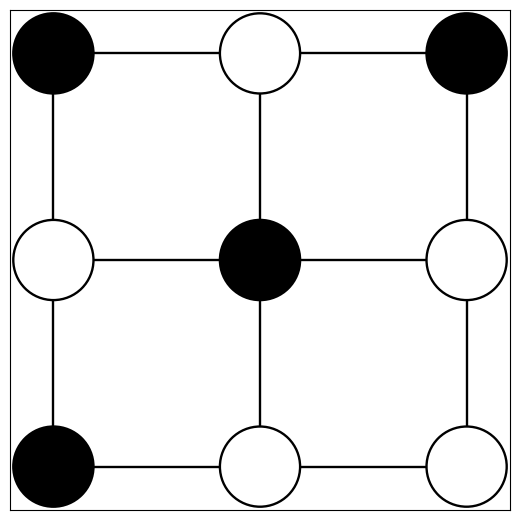

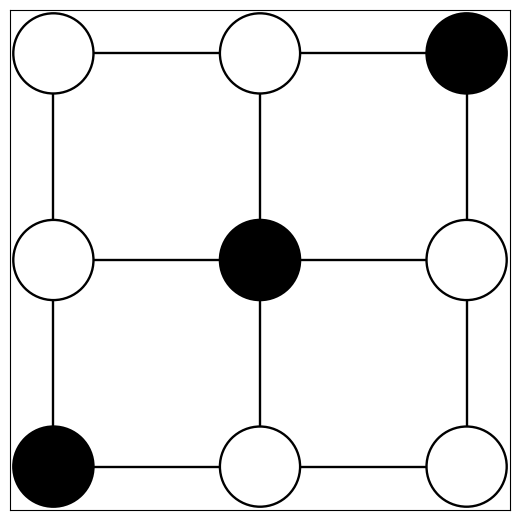

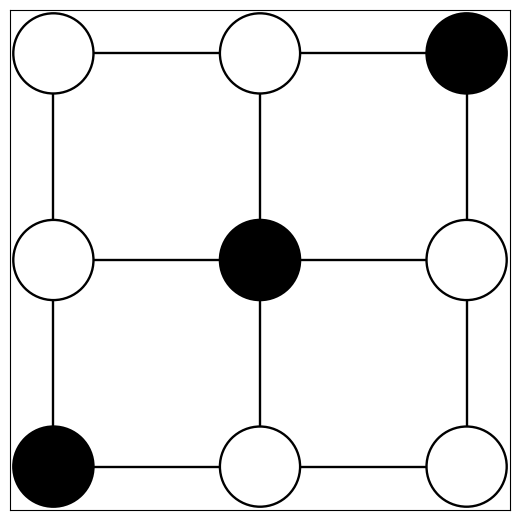

In [4]:
for ii in range (50):
    step()
    
    if ii%5 == 0:
        plot_grid(color_values)

plot_grid(color_values)

---
## Punto 2. Distribución del número de partículas del modelo Hard-core


Antes de hallar la distribución, definimos algunas funcines que serán de utilidad: 
 - Contar el número de partículas de una grilla determinada.
 - Evolucionar el sistema hasta un valor de $n$ lo suficientemente grande (en este caso, $n = 10k$, o $n=100k$).
 - Hallar el valor promedio del histograma.

In [5]:
def count_particles(color_values):
    return list(color_values.values()).count("black")
    

def find_evolution(n):
    for _ in range(n): step()
    
    
def find_expected_value(particle_distribution, n_repetitions):

    x_vector = list(particle_distribution.keys())
    y_vector = list(particle_distribution.values())
    suma = sum([x_vector[i] * y_vector[i] for i in range(len(particle_distribution))])
        
    return suma/n_repetitions


Para hallar el histograma, definimos una "simulación", de como avanza el sistema hasta el paso $n$; es decir, hallamos $X_{n}$, y hacemos un número determinado de simulaciones.

Existen 2 parámetros de entrada:
- $k$, el tamaño de la grilla del sistema.
- n_repetitions, el número de simulaciones que se realizarán.

Después de esto, se cuenta el número de partículas presentes en la distribución.

In [6]:
k = 10
n_repetitions = 1000

particle_distribution1 = {i: 0 for i in range(k*k)} # Distribución para 10k
particle_distribution2 = {i: 0 for i in range(k*k)} # Distribución para 100k

for _ in range (n_repetitions):
    """Hallar el histograma para 10k pasos de evolucion"""
    ## Reiniciar los valores de G    
    G, color_values = restart_G(k)
    
    ## Hacer una evolución de muchos pasos
    find_evolution(10000)
    
    
    ## Contar cuántas partículas hay
    particulas = count_particles(color_values)
       
    
    ## Añadir el resultado a la distribución
    particle_distribution1[particulas] += 1
    
    
    
    """Repetir el procedimiento, ahora con 100k"""
    ## Reiniciar los valores de G    
    G, color_values = restart_G(k)
    
    ## Hacer una evolución de muchos pasos
    find_evolution(100000)
    
    
    ## Contar cuántas partículas hay
    particulas = count_particles(color_values)
       
    
    ## Añadir el resultado a la distribución
    particle_distribution2[particulas] += 1
    

print("Simulación finalizada")
print(f"Se han simulado {n_repetitions} veces los sistemas " + r'$X_{10k}$ y $X_{100k}$')
print("\n \n")

Simulación finalizada
Se han simulado 1000 veces los sistemas $X_{10k}$ y $X_{100k}$

 



Finalmente, se grafica el histograma obtenido del número de partículas presentes en el sistema, donde también se incluye el valor promedio:

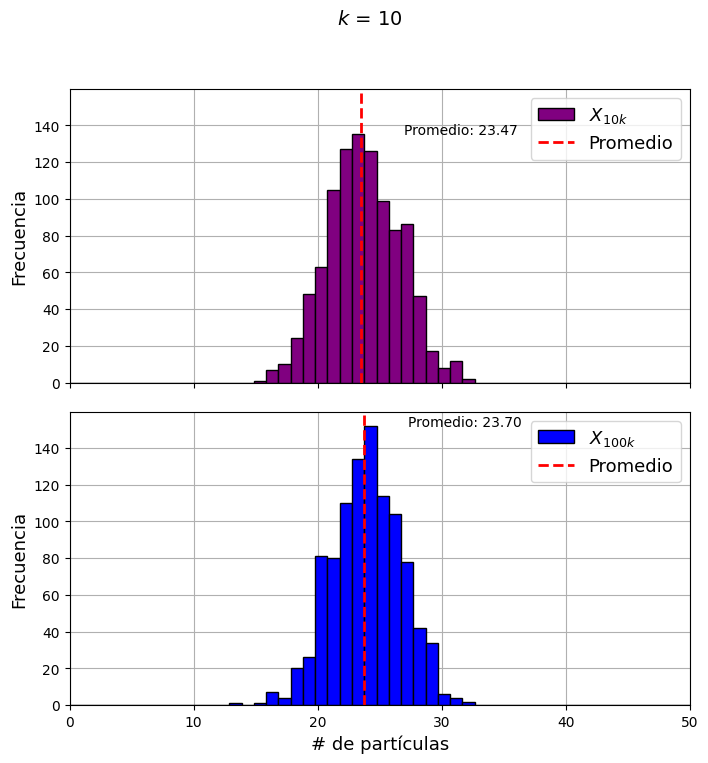

In [7]:
def plot_histograms():

    ## Valores para graficar en el caso X_10k
    average1 = find_expected_value(particle_distribution1, n_repetitions)
    keys1 = list(particle_distribution1.keys())
    values1 = list(particle_distribution1.values())

    ## Valores para graficar en el caso X_100k
    average2 = find_expected_value(particle_distribution2, n_repetitions)
    keys2 = list(particle_distribution2.keys())
    values2 = list(particle_distribution2.values())



    ## Opciones generales de la gráfica
    plt.rcParams['axes.axisbelow'] = True # Grid detrás de las figuras
    fig = plt.figure(figsize=(8,8))
    gs = fig.add_gridspec(2, hspace=0.1) # Espacio entre las gráficas
    axis = gs.subplots(sharex=True, sharey=True)


    ## Gráfica para X_10k
    axis[0].hist(keys1, bins=len(keys1), weights=values1, color='purple', edgecolor='k', alpha=1, label=r"$X_{10k}$")
    axis[0].axvline(average1, color='r', linestyle='dashed', linewidth=2, label="Promedio")
    axis[0].text(average1*1.15, max(values1)*1.00, 'Promedio: {:.2f}'.format(average1))


    # Gráfica para X_100k
    axis[1].hist(keys2, bins=len(keys2), weights=values2, color='b', edgecolor='k', alpha=1, label=r"$X_{100k}$")
    axis[1].axvline(average2, color='r', linestyle='dashed', linewidth=2, label="Promedio")
    axis[1].text(average2*1.15, max(values2)*1.00, 'Promedio: {:.2f}'.format(average2))



    for ii in range (len(axis)):
        axis[ii].set_ylabel("Frecuencia",size=13)
        axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
        axis[ii].grid()
        axis[ii].legend(fontsize=13)



    plt.xlabel("# de partículas", size=13)
    plt.xlim(0, 5*k)
    fig.suptitle(fr"$k$ = {k}", size=14)
    plt.show()
    
    
plot_histograms()

---
# Punto 3 - Gibbs Sampler para las q-coloraciones (q-colorings)

Nuevamente, iniciamos creando la grilla del módelo. Para esto, creamos un grafo cuadrado 2D de NetworkX con colores que siguen una diagonal, asegurando así que el estado inicial es una q-coloración válida. 


Este grafo recibe de input las dimensiones $k$ del grafo, y el número $q$ de colores. Se tiene las condiciones:

- $3\leq k \leq 20$,
- $2\leq q \leq 10$.

Los colores ya se encuentran en el código, por lo que no es necesario que el usuario los ingrese. Finalmente, respecto al código de los puntos 1 y 2, se redefinen exclusivamente las funciones necesarias.

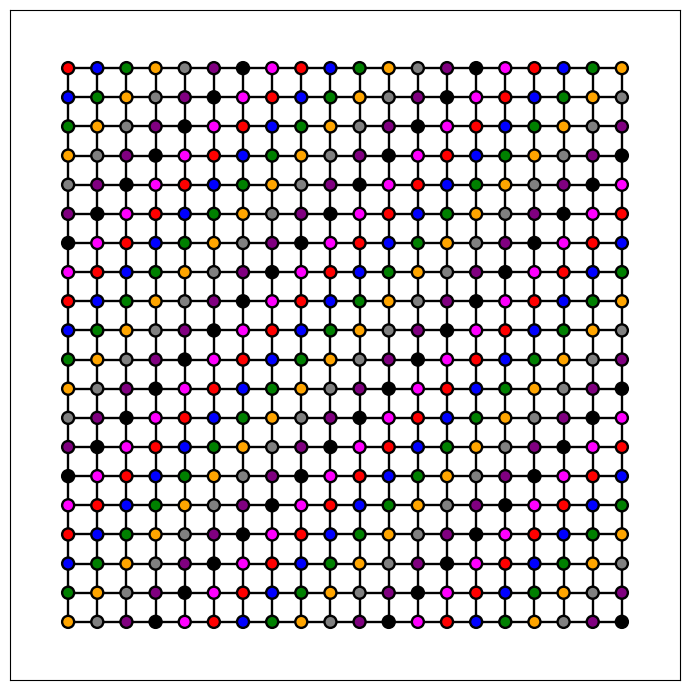

In [8]:
def restart_G(k, q, colors_list):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    
    #color_values = {node: colors_list[((i+ (i//k)*(k+1%2)) % 2)] for i, node in enumerate(G.nodes())}
    color_values = {node: colors_list[(i + i//k - (i//k)*k)%q] for i, node in enumerate(G.nodes())}
    
    return G, color_values



## Inputs del programa    
k = 20
q = 8


colors_list = ["red", "blue", "green", "orange", "grey", "purple", \
               "black", "magenta", "white", "cyan"]



colors_list = colors_list[:q:]

# Iniciar el valor de los colores
G, color_values = restart_G(k, q, colors_list)

# Graficar la grilla
plot_grid(color_values)

A continuación, definimos la función que actualiza el sistema en un único paso; es decir, pasa de $X_n$  a $X_{n+1}$. Para esto, empleamos un algoritmo que hace los siguientes pasos:

1. Elige un vértice $v$ al azar, con distribución uniforme.
2. Encuentra una lista con los colores "legales" que puede tomar el nodo $v$.
3. De esta lista, elige un color al azar, y se lo asigna al nodo $v$, dejándo el resto de nodos con sus colores intactos.

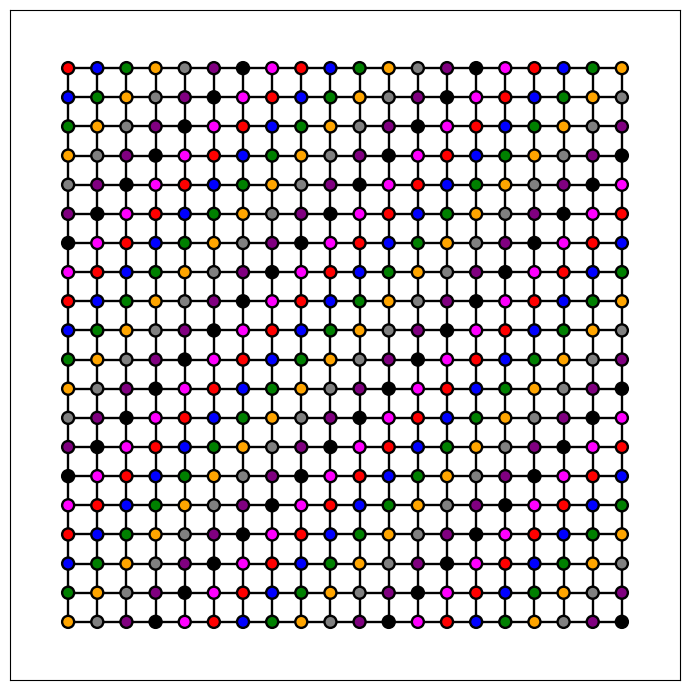

In [9]:
def find_valid_colors(color_values, x, y):
    colores_vecinos = set()
    
    for vecino in G.neighbors((x,y)):
        colores_vecinos.add(color_values[vecino])
    
    valid_colors = list(set(colors_list) - colores_vecinos)
    
    return valid_colors    
    
    
def step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))
      
    valid_colors = find_valid_colors(color_values, x, y)
    new_color = random.choice(valid_colors)
    color_values[(x,y)] = new_color
    
    

step()

plot_grid(color_values)

Hacemos evolucionar el sistema un número lo suficientemente grande de pasos;n este caso, 100k.

Adicionalmente, con fin de poder visualizar la evolución del sistema, se grafican algunos de los primeros pasos.

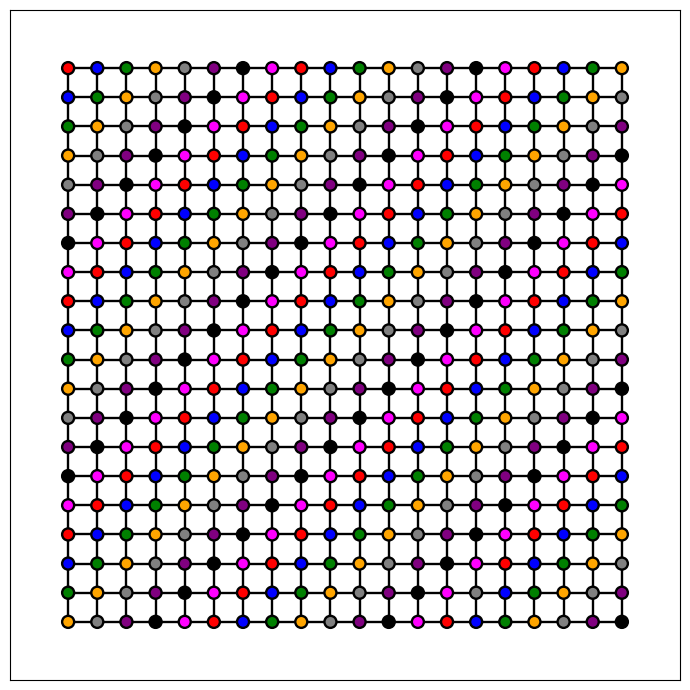

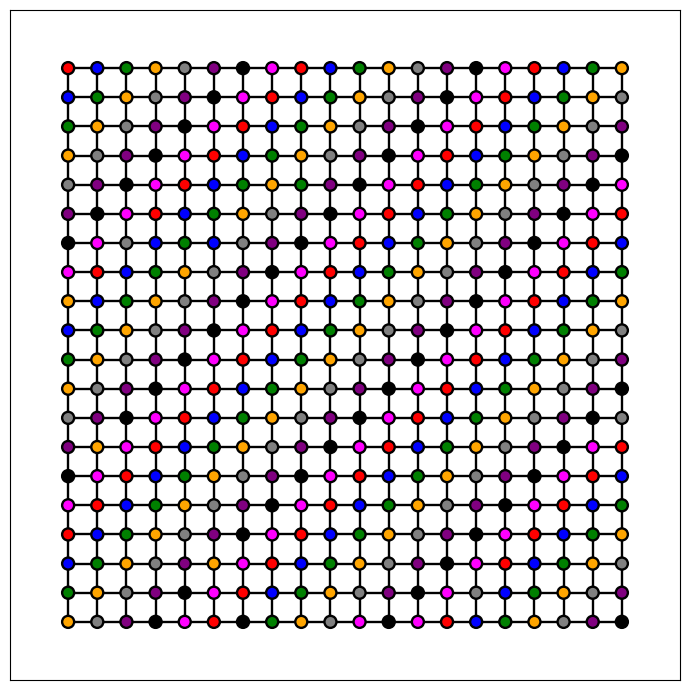

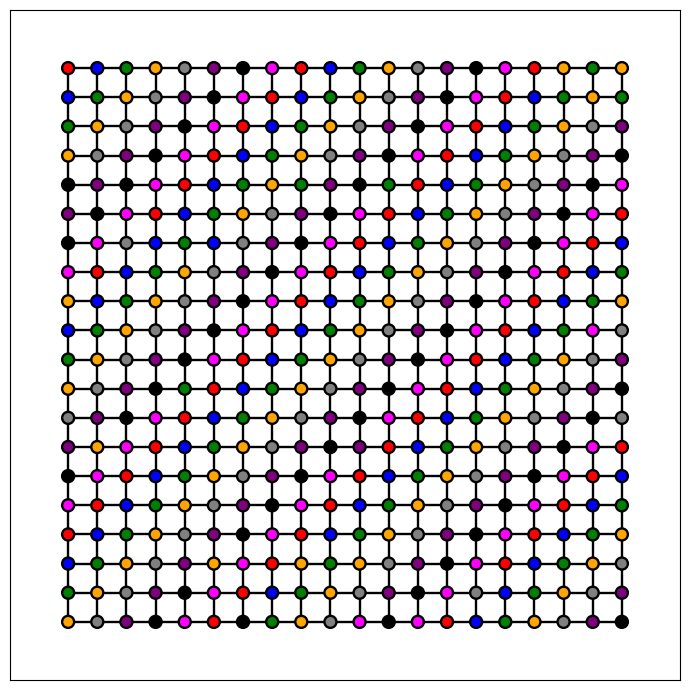

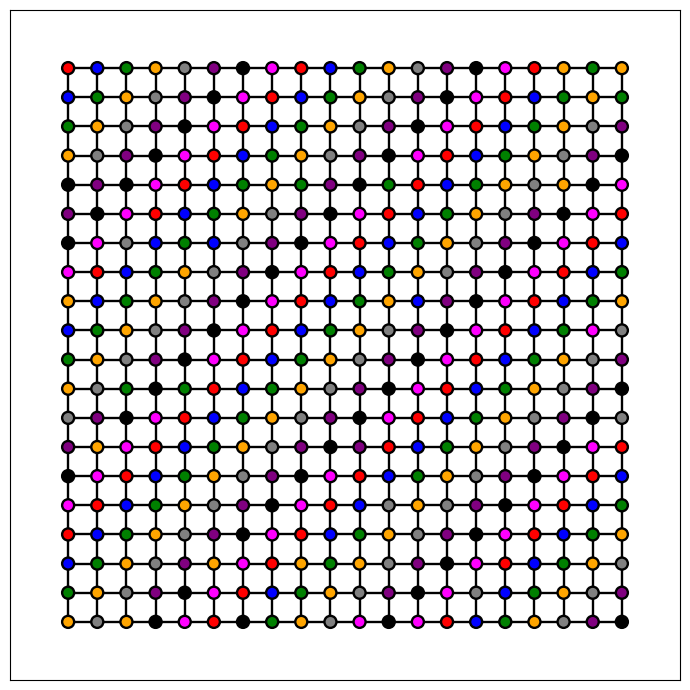

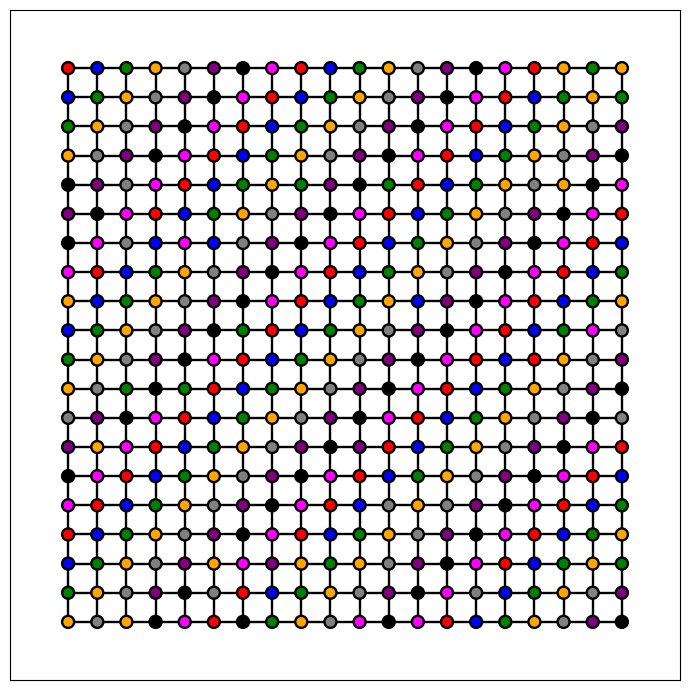

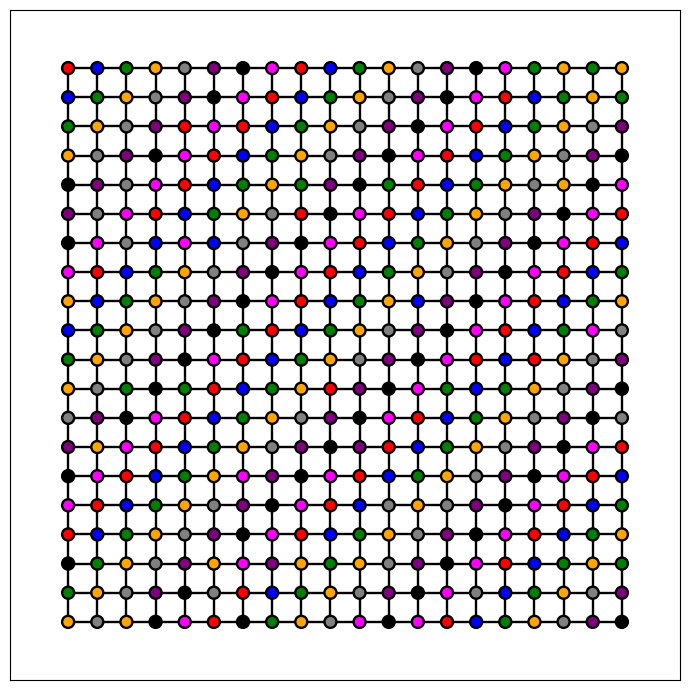

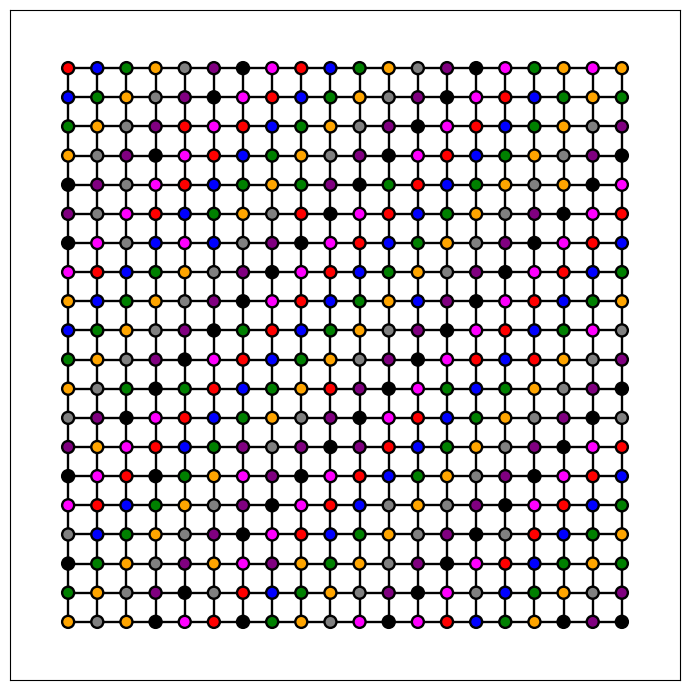

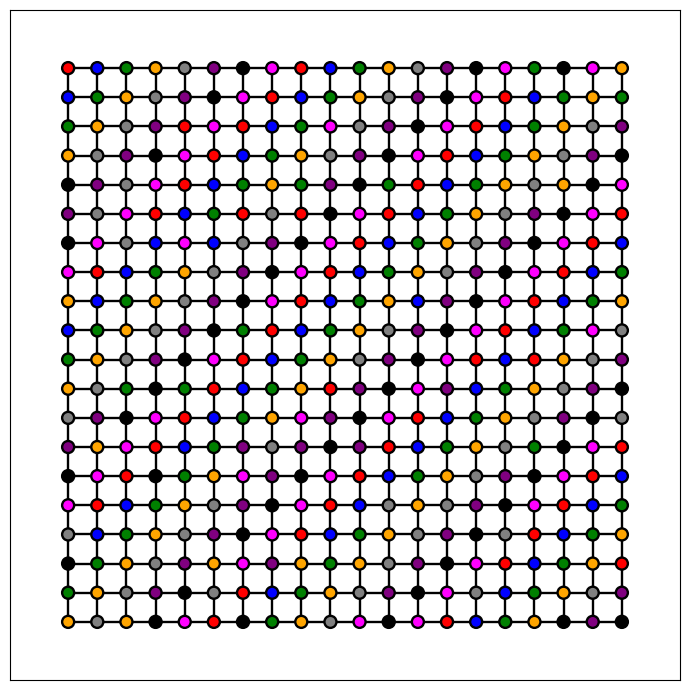

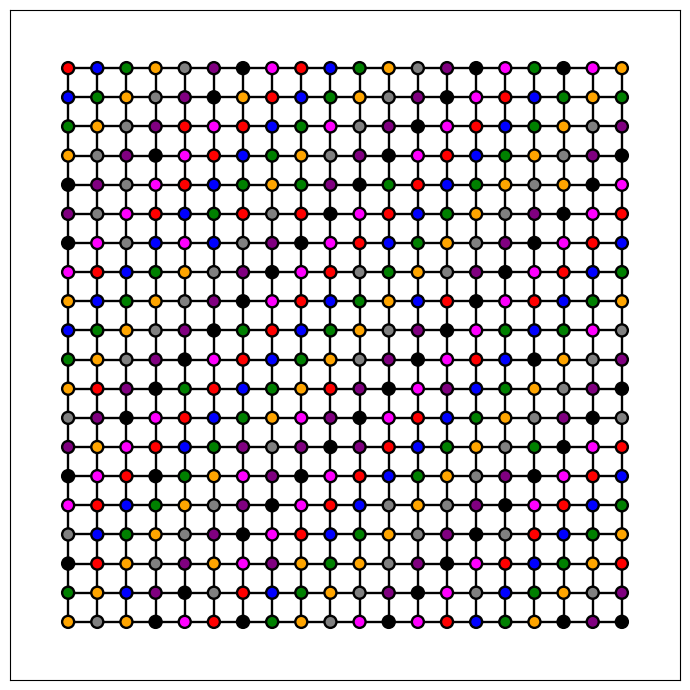

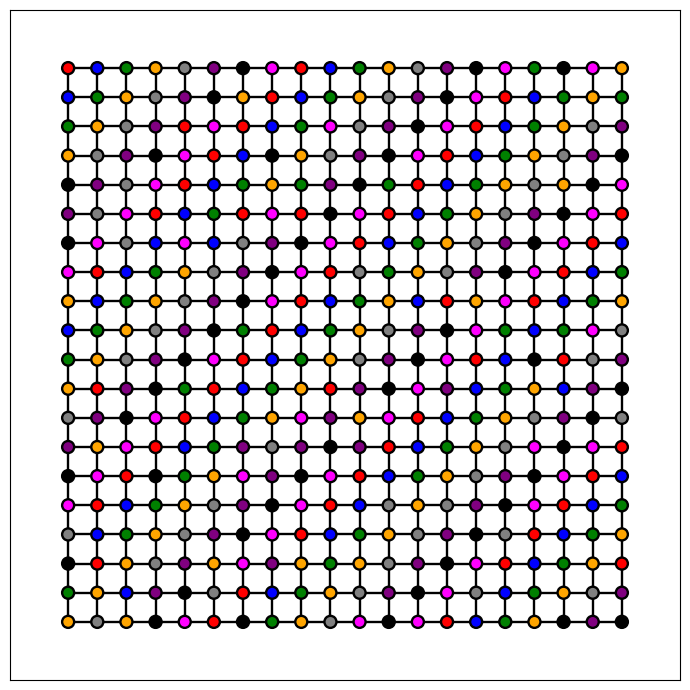

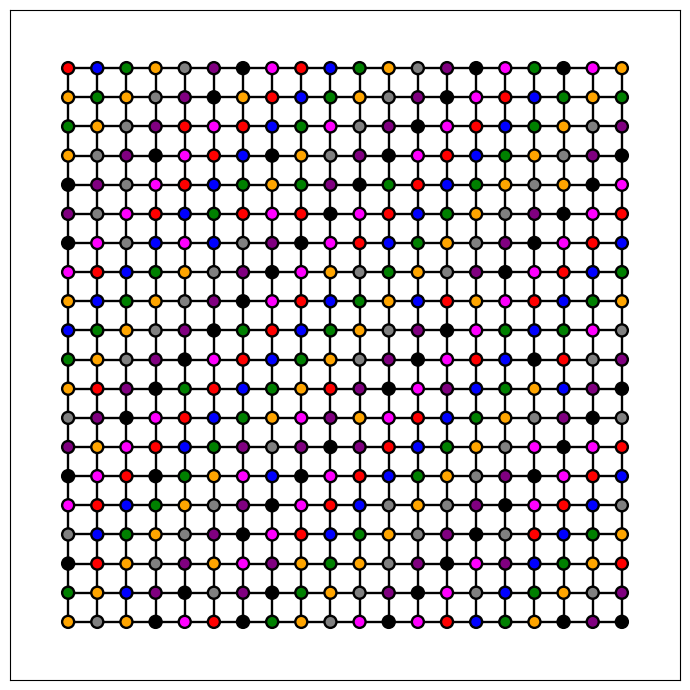

In [10]:
n_steps = 100000
G, color_values = restart_G(k, q, colors_list)

for ii in range (n_steps):
    step()
    
    if ii <= 90:
        if ii%9 == 0:
            plot_grid(color_values)
    


Finalmente, graficamos la posición final del sistema, después de 100k pasos de evolución.

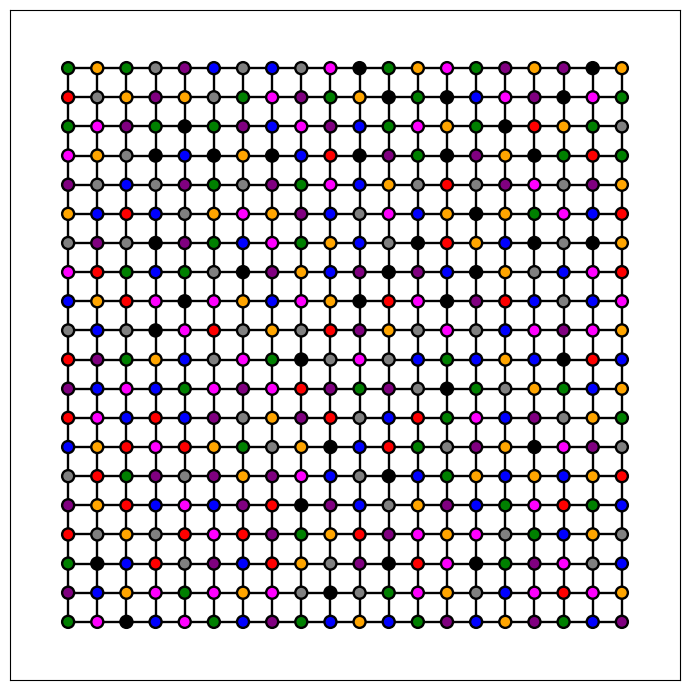

In [11]:
plot_grid(color_values)